## Praktikum 1
Klasifikasi dengan data dummy

In [2]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

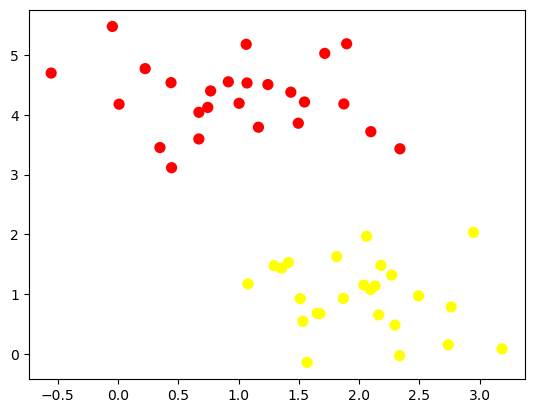

In [3]:
from sklearn.datasets import make_blobs as mb
X, y = mb(n_samples=50, centers=2, random_state=0, cluster_std=0.6) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

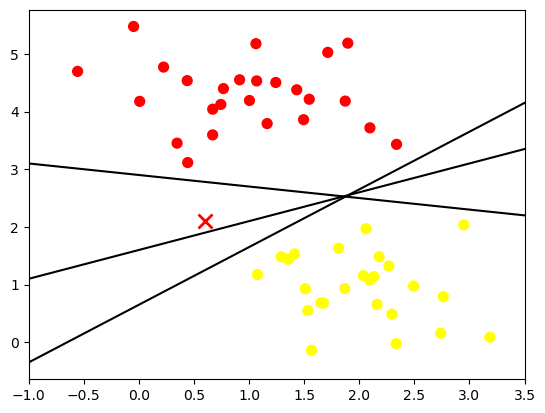

In [4]:
xfit = np.linspace(-1, 3.5) # Membuat garis 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # membuat plot 
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10) 

# Membuat garis boundaries manual (nantinya akan otomatsi menggunakan library)
for m,b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit+b, '-k')
plt.xlim(-1, 3.5);

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

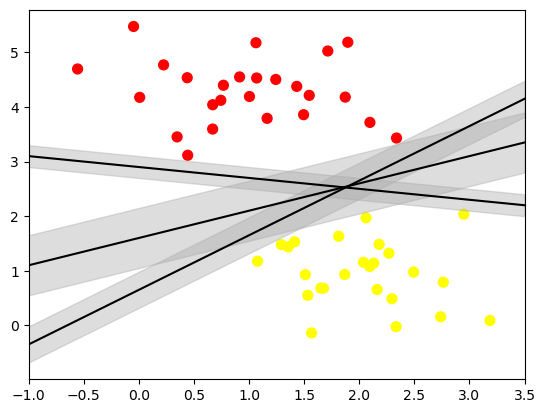

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

## Penerapan Fitting SVM

In [6]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear') # penggunaan parameter "C" masih opsional
model.fit(X, y)

SVC(kernel='linear')

In [7]:
# buat sebuah fungsi untuk menampilkan fitting dataset
def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        # "ax is None" berarti kita ingin tahu apakah kita sudah memiliki selembar kertas (kertas ini disebut "ax") atau belum. Jika kita belum memiliki selembar kertas, kita harus membuat satu.
        ax = plt.gca()
        # "ax = plt.gca()" adalah cara kita membuat selembar kertas jika kita belum punya satu. "plt.gca()" adalah cara kita mendapatkan selembar kertas yang sudah ada (jika sudah ada) atau membuat yang baru (jika belum ada).
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
     # "xlim = ax.get_xlim()" dan "ylim = ax.get_ylim()" adalah cara kita mengetahui batas atau ukuran selembar kertas kita. Seperti, berapa panjang dan lebarnya.

    # Buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    # Pertama, kita ingin membuat beberapa garis atau titik pada kertas. Jadi, kita ingin tahu berapa banyak titik yang akan kita buat. Kode pertama, x = np.linspace(xlim[0], xlim[1], 30), memberitahu kita untuk membuat 30 titik sepanjang garis horizontal (sepanjang kertas) dan y = np.linspace(ylim[0], ylim[1], 30) memberitahu kita untuk membuat 30 titik sepanjang garis vertikal (sepanjang kertas juga).
    Y, X = np.meshgrid(y, x)
    # Setelah kita tahu di mana kita ingin meletakkan titik-titik itu, kita ingin membuat sebidang kertas lain yang memiliki titik-titik ini dalam bentuk yang rapi. Jadi, kita membuat kertas tambahan menggunakan Y, X = np.meshgrid(y, x). Kertas ini memiliki titik-titik yang sama seperti yang tadi kita putuskan.
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # Selanjutnya, kita ingin menempatkan semua titik ini di atas satu kertas besar, sehingga kita bisa melihat semuanya dengan jelas. Kode ini, xy = np.vstack([X.ravel(), Y.ravel()]).T, mengambil semua titik dari kertas tambahan dan meletakkannya di atas kertas besar dalam urutan yang rapi.
    P = model.decision_function(xy).reshape(X.shape)
    # Terakhir, kita ingin tahu seberapa penting setiap titik ini dalam pembuatan keputusan kita. Kode ini, P = model.decision_function(xy).reshape(X.shape), menghitung pentingnya setiap titik tersebut dengan bantuan model yang kita miliki. Ini membantu kita dalam membuat keputusan di mana kita harus menggambar garis atau batas pada kertas.
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

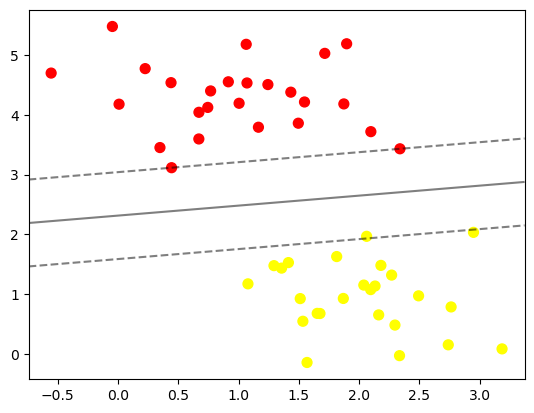

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [9]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

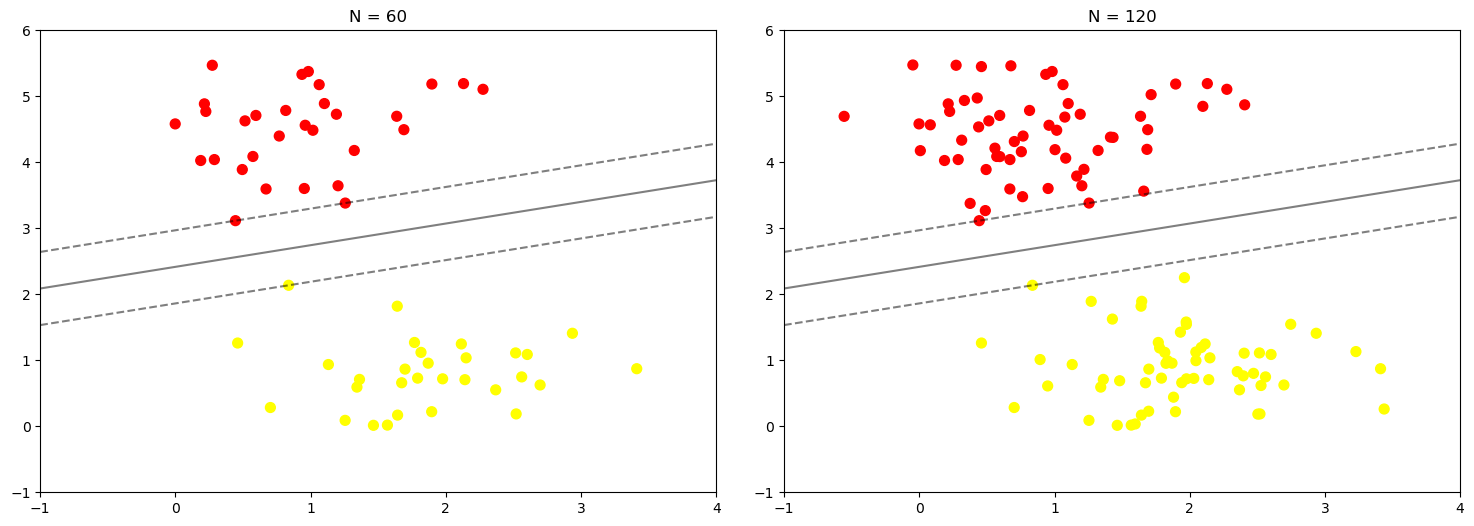

In [10]:
def plot_svm(N=10, ax=None):
    X,y = mb(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X,y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]) :
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Data tidak terpisah secara linier
Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

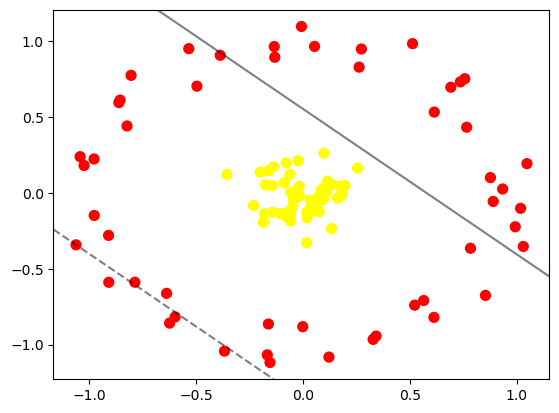

In [11]:
# contoh data tidak terpisah secara linier 
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [12]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [13]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y) :
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()
    
interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180), X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.04102768e+00,  2.39084223e-01],
       [-5.61733679e-02,  7.52725794e-03],
       [-1.33838343e-01,  9.65317892e-01],
       [ 1.21934728e-01, -1.08248559e+00],
       [-1.06025509e+00, -3.42132340e-01],
       [-7.84385895e-02, -1.30992031e-01],
       [ 6.58208533e-02, -5.36991790e-02],
       [ 7.96844470e-02, -3.95788614e-02],
       [ 8.72681340e-02, -7.91986384e-04],
       [-1.53583225e-01, -1.11804547e+00],
       [ 5.64705915e-01, -7.09410799e-01],
       [ 3.44145986e-02, -4.60232092e-02],
       [ 1.04725705e+00,  1.93270279e-01],
       [-8.03022766e-01,  7.75588673e-01],
       [-1.62662852e-02, -2.14281888e-02],
       [ 7.57379691e-02, -2.28590705e-02],
       [-7.51840290e-02, -1.58455759e-01],
       [ 1.96754173e-01,  4.86962470e-02],
       [ 7.65576489e-01,  4.33347727e-01],
       [-1.61111340e-01, -8.64482591e-01],
       [ 1.80047908e-02, -3.27526000e-01],
       [ 9.86982983e-02,  2.61928669e-01],
       

In [14]:
interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

SyntaxError: invalid character '…' (U+2026) (3447092626.py, line 1)

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

In [ ]:
SVC(C=1000000.0)

SVC(C=1000000.0)

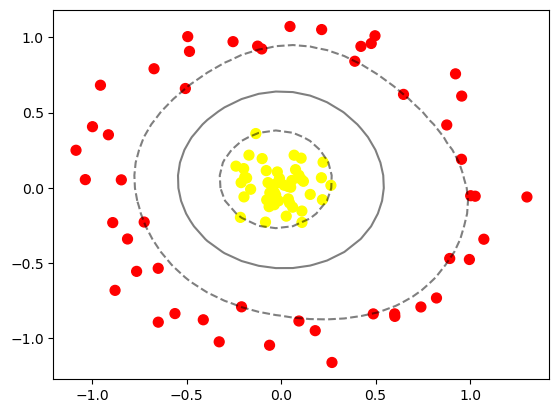

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## Data Overlap

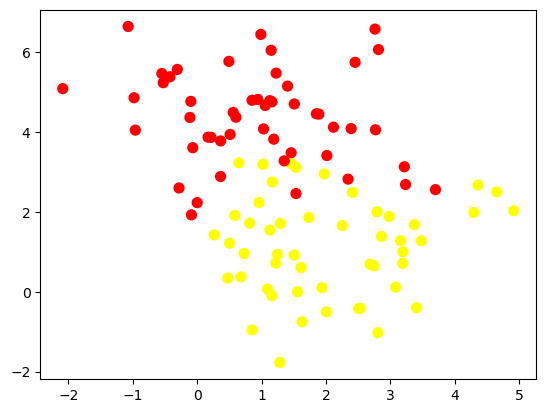

In [ ]:
X, y = mb( n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter( X[:,0], X[:, 1], c=y, s=50, cmap='autumn')


untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

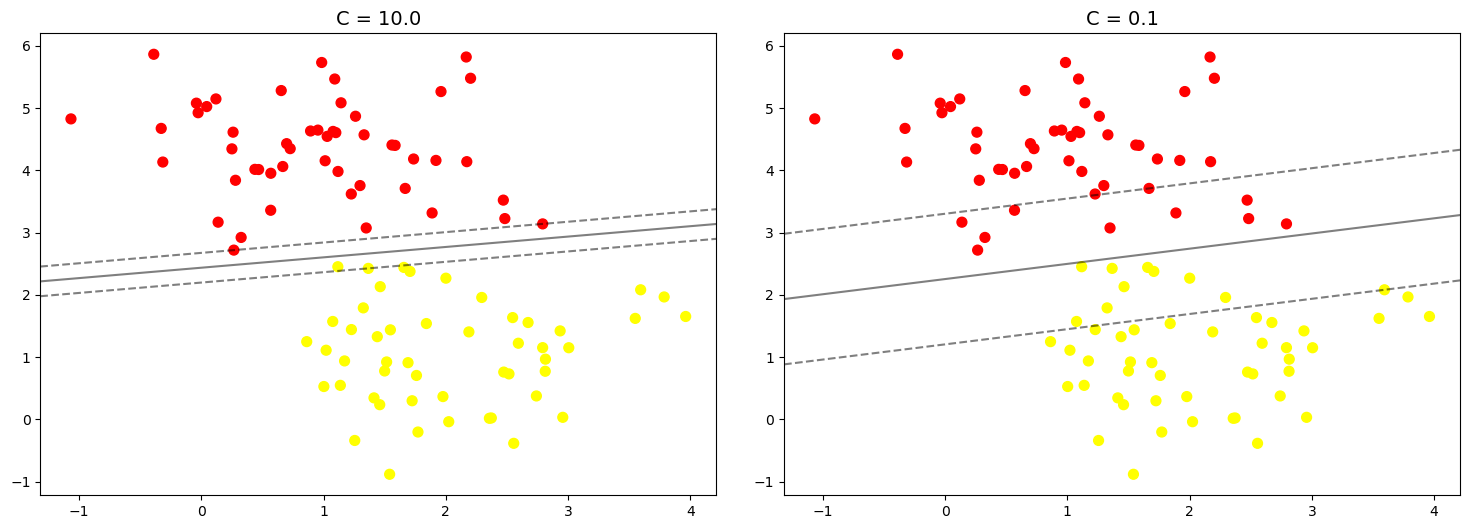

In [ ]:
X, y = mb( n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]) :
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter( X[:,0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)
